In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.lines import Line2D
from scipy.integrate import simps
from scipy.signal import detrend
from fitter import Fitter, get_common_distributions, get_distributions

# Sequential Simulation

In [2]:
salinity = pd.read_table('../../data/Salinity/Salinity_Contrast_IAP_data_record_SC2000.txt',skiprows=13,sep='\s+',header=None)
salinity.columns = ['date','SC','2sd','smoothed']
for i in range(732):
    salinity.iloc[i,0] = datetime.date(year=int(salinity.iloc[i,0]),month=i%12+1,day=1)

In [3]:
salinity

,date,SC,2sd,smoothed
0,1960-01-01,-0.01141,0.00597,-0.01204
1,1960-02-01,-0.01064,0.00599,-0.01206
2,1960-03-01,-0.01123,0.00605,-0.01208
3,1960-04-01,-0.01124,0.00602,-0.01209
4,1960-05-01,-0.01079,0.00598,-0.01211
...,...,...,...,...
727,2020-08-01,0.00015,0.00119,0.00176
728,2020-09-01,0.00020,0.00134,0.00178
729,2020-10-01,-0.00065,0.00134,0.00180
730,2020-11-01,-0.00125,0.00134,0.00181


In [4]:
sst = np.load('../../data/SST/ersst.v5.1960_2020_sst.npy')
ssta = np.load('../../data/SST/ersst.v5.1960_2020_ssta.npy')

In [5]:
ssta_mean = np.nanmean(np.nanmean(ssta,axis=0),axis=0)

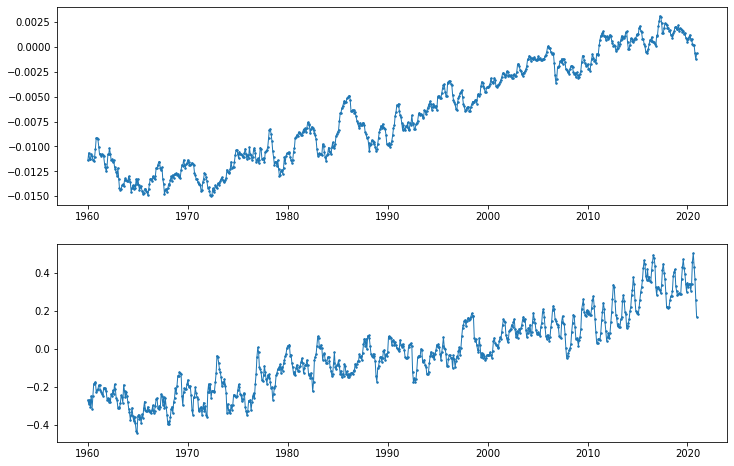

In [6]:
fig, ax = plt.subplots(2,1,figsize=[12,8])
ax[0].plot(salinity.date,salinity.SC,'.-',lw=1,markersize=3)
ax[1].plot(salinity.date,ssta_mean,'.-',lw=1,markersize=3)
plt.show()

In [14]:
SC_detrend = detrend(salinity.SC, axis=- 1, type='linear', overwrite_data=False)
SSTA_detrend = detrend(ssta_mean, axis=- 1, type='linear', overwrite_data=False)

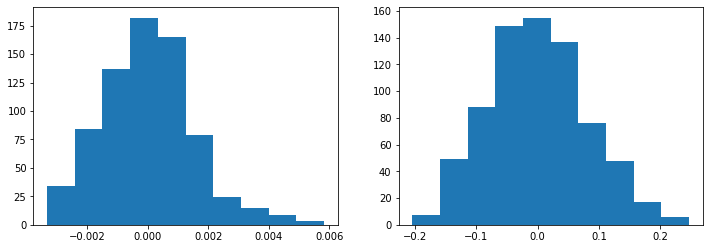

In [16]:
fig, ax = plt.subplots(1,2, figsize=[12,4])
ax[0].hist(SC_detrend)
ax[1].hist(SSTA_detrend)
plt.show()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,190254.575953,-739.418844,4083.358841,inf,0.056376,0.018329
gamma,209866.291670,-781.673880,4161.769365,inf,0.038582,0.220189
lognorm,238213.986347,-797.571373,4254.512850,inf,0.053644,0.028523
cauchy,287355.770261,-784.515565,4385.204909,inf,0.080675,0.000136
rayleigh,301344.157740,inf,4419.998280,inf,0.081229,0.000120


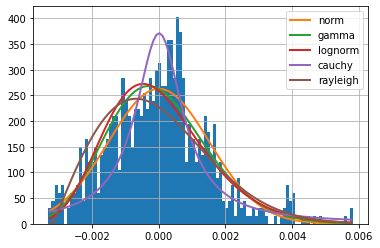

In [17]:
f = Fitter(SC_detrend,distributions= get_common_distributions())
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,66.136888,-47.524604,-1739.980083,inf,0.021789,8.701652e-01
lognorm,66.191409,-48.540232,-1739.376895,inf,0.018933,9.510812e-01
norm,67.935774,-45.246073,-1726.931835,inf,0.030598,4.900387e-01
exponpow,85.109345,-43.677117,-1555.362225,inf,0.053373,2.976721e-02
rayleigh,126.194377,-101.909233,-1273.633051,inf,0.131246,1.869869e-11


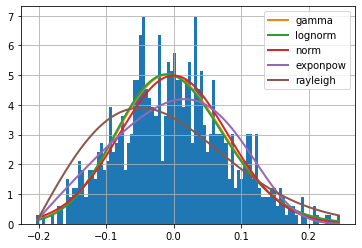

In [18]:
f = Fitter(SSTA_detrend,distributions= get_common_distributions())
f.fit()
f.summary()

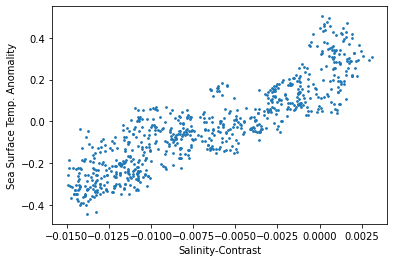

In [19]:
fig, ax = plt.subplots(1, figsize=[6,4])
ax.scatter(salinity.SC, ssta_mean,s=3)
ax.set_xlabel('Salinity-Contrast')
ax.set_ylabel('Sea Surface Temp. Anomality')
plt.show()

In [16]:
base = 20 #years
update = 5 #years
for itr in range((120-base)//update):
    extract(base,update,itr)

(28, 2)
(38, 2)
(53, 2)
(65, 2)
(78, 2)
(88, 2)
(95, 2)
(106, 2)
(116, 2)
(129, 2)
